In [ ]:
# 生成斜45度条纹图片
# 2025/03/18

from PIL import Image, ImageDraw

# 图片大小
width, height = 800, 800

# 创建空白图片
image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(image)

# 定义四种颜色
colors = [
    (0,255,255),
    (255,0,0),
    (0,128,0)
]

# 条纹宽度
stripe_width = 50

# 绘制斜45度条纹
for x in range(width):
    for y in range(height):
        # 计算斜45度的位置
        pos = (x + y) // stripe_width
        # 根据位置选择颜色
        color = colors[pos % len(colors)]
        # 绘制像素
        draw.point((x, y), fill=color)

# 保存图片
image.save("diagonal_stripes.png")

# 显示图片
image.show()

In [ ]:
# 颜色百分比测试脚本
# 2025/03/18
from PIL import Image
from colorthief import ColorThief
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

def get_image_colors(image_path, num_colors=5):
    # 打开图像
    img = Image.open(image_path)
    
    # 转换为RGB模式
    img = img.convert('RGB')
    
    # 获取所有像素值
    pixels = np.array(img).reshape(-1, 3)
    
    # 计算每个颜色的出现次数
    pixel_counts = Counter(map(tuple, pixels))
    
    # 按出现次数排序
    sorted_pixel_counts = pixel_counts.most_common(num_colors)
    
    # 获取主颜色及其占比
    total_pixels = sum(count for color, count in sorted_pixel_counts)
    color_proportions = {f'#{r:02x}{g:02x}{b:02x}': count / total_pixels * 100 for (r, g, b), count in sorted_pixel_counts}
    
    return color_proportions


def show_color_distribution(image_path):
    # 获取颜色占比
    color_proportions = get_image_colors(image_path)
    
    # 显示颜色分布
    plt.figure(figsize=(6, 2))
    plt.bar(color_proportions.keys(), color_proportions.values(), color=color_proportions.keys())
    plt.title("Color Proportions")
    plt.xlabel("Color")
    plt.ylabel("Percentage")
    plt.show()

# 你可以将此处的路径更改为你自己的图像路径
image_path = "./flag/turkey.png"

# 获取图像的颜色占比
color_proportions = get_image_colors(image_path, num_colors=5)

# 输出颜色占比
print(color_proportions)

# 显示颜色占比图表
show_color_distribution(image_path)


In [ ]:

# 打印图例
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

legend_elements = [
    Line2D([0], [0], marker='s', color='k', markerfacecolor='lightblue', markersize=10, label='好莱坞环球影城', linestyle='None'),
    Line2D([0], [0], marker='s', color='k', markerfacecolor='lightgreen', markersize=10, label='奥兰多环球影城度假村', linestyle='None'),
    Line2D([0], [0], marker='s', color='k', markerfacecolor='lightcoral', markersize=10, label='日本环球影城', linestyle='None'),
    Line2D([0], [0], marker='s', color='k', markerfacecolor='lightyellow', markersize=10, label='北京环球度假区', linestyle='None'),
    Line2D([0], [0], marker='s', color='k', markerfacecolor='lightpink', markersize=10, label='新加坡环球影城', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='lightgrey', markersize=10, label='英国环球影城(在建)', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='center', title='图例', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

# 设置横纵坐标刻度不可见
ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_axis_off()

# 保存图像并显示
plt.savefig('test.png', dpi=1200, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()


In [28]:
import requests
import pandas as pd
import geopandas as gpd

def get_gaode_parks(api_key, city=None, output_file='people_park.csv'):
    base_url = "https://restapi.amap.com/v3/place/text"
    
    # 如果未指定城市，则搜索全国
    # if city is None:
    #     city = "中国"
    
    params = {
        'key': api_key,
        'keywords': '人民公园',
        # 'types': '110101',
        'city': city,
        'citylimit': 'true',
        'offset': 25,  # 每页记录数
        'page': 1,      # 页码
        'extensions': 'base'
    }
    
    all_parks = []
    
    while True:
        response = requests.get(base_url, params=params)
        data = response.json()
        print(data)  # 打印返回的JSON数据
        if data['status'] == '1' and int(data['count']) > 0:
            for poi in data['pois']:
                park_info = {
                    'name': poi['name'],
                    'address': poi['address'],
                    'province': poi['pname'],
                    'city': poi['cityname'],
                    'district': poi['adname'],
                    'longitude': poi['location'].split(',')[0],
                    'latitude': poi['location'].split(',')[1]
                }
                if '人民公园' in poi['name']:
                    all_parks.append(park_info)
            
            if len(data['pois']) < params['offset']:
                break
            params['page'] += 1
        else:
            break
    
    # 保存到CSV文件
    df = pd.DataFrame(all_parks)
    df.to_csv(output_file, index=False, encoding='utf_8_sig')
    return df

# 使用示例
api_key = "fe09ffacf890bf1c9471054ce5dc122d"
world = gpd.read_file('./shp2json/chinacity.geojson')
for city_name in world['name']:
    parks_df = get_gaode_parks(api_key, city=city_name)
    
print('success!')

{'suggestion': {'keywords': [], 'cities': []}, 'count': '16', 'infocode': '10000', 'pois': [{'parent': [], 'address': '兴田一路314号', 'distance': [], 'pname': '广东省', 'importance': [], 'biz_ext': [], 'biz_type': 'tour', 'cityname': '梅州市', 'type': '风景名胜;公园广场;公园', 'photos': [], 'typecode': '110101', 'shopinfo': '2', 'poiweight': [], 'childtype': [], 'adname': '兴宁市', 'name': '兴宁人民公园', 'location': '115.725878,24.143386', 'tel': '0753-3328130;0753-3331332', 'shopid': [], 'id': 'B02F103OU3'}, {'parent': [], 'address': '(停运)兴宁22路;兴宁17路;兴宁19路;兴宁1路;兴宁3路;兴宁7路', 'distance': [], 'pname': '广东省', 'importance': [], 'biz_ext': [], 'biz_type': [], 'cityname': '梅州市', 'type': '交通设施服务;公交车站;公交车站相关', 'photos': [], 'typecode': '150700', 'shopinfo': '2', 'poiweight': [], 'childtype': [], 'adname': '兴宁市', 'name': '人民公园站(公交站)', 'location': '115.726766,24.143100', 'tel': [], 'shopid': [], 'id': 'BV09049289'}, {'parent': [], 'address': '兴田一路人民公园内', 'distance': [], 'pname': '广东省', 'importance': [], 'biz_ext': [], 'biz_

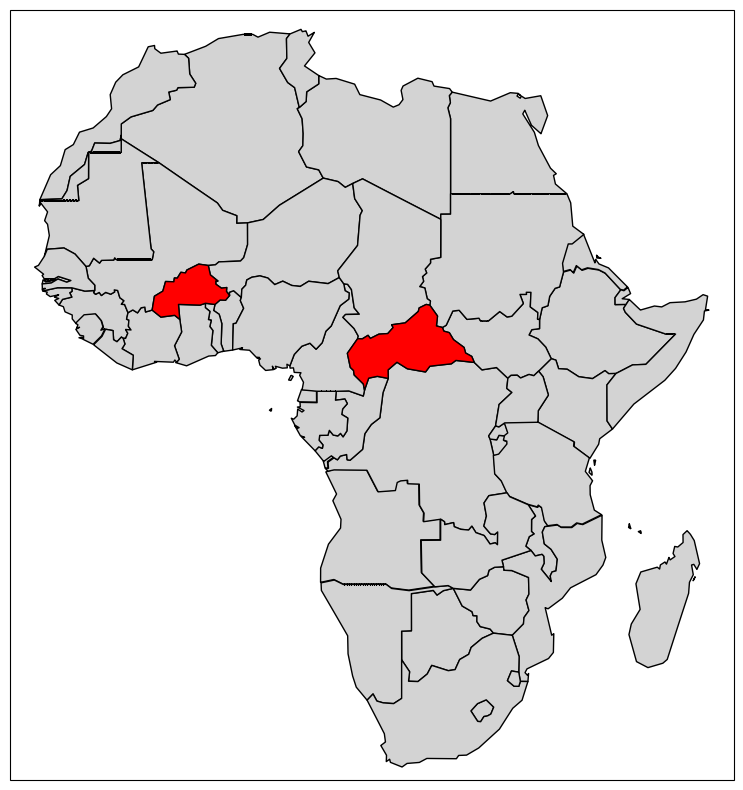

In [2]:
# 非洲通用

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from shapely.geometry import Polygon
import cartopy.feature as cfeature

plt.rcParams['font.sans-serif'] = ['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

def loopFillColor(countryList, color):
    for country in countryList:
        country_data = world[world['name'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree())

world = gpd.read_file('./worldmap4/world_update.json')
world = world.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})
# world.plot(ax=ax, color='darkgray', edgecolor='white', linewidth=1, transform=ccrs.PlateCarree())

countries_to_fill1 = [
    "阿尔及利亚",
    "埃及",
    "埃塞俄比亚",
    "安哥拉",
    "贝宁",
    "博茨瓦纳",
    "布隆迪",
    "赤道几内亚",
    "多哥",
    "厄立特里亚",
    "佛得角",
    "冈比亚",
    "刚果（金）",
    "刚果（布）",
    "吉布提",
    "几内亚",
    "几内亚比绍",
    "加纳",
    "加蓬",
    "津巴布韦",
    "喀麦隆",
    "科摩罗",
    "科特迪瓦",
    "肯尼亚",
    "莱索托",
    "利比里亚",
    "利比亚",
    "卢旺达",
    "马达加斯加",
    "马拉维",
    "马里",
    "毛里求斯",
    "毛里塔尼亚",
    "摩洛哥",
    "莫桑比克",
    "纳米比亚",
    "南非",
    "南苏丹",
    "尼日尔",
    "尼日利亚",
    "塞拉利昂",
    "塞内加尔",
    "塞舌尔",
    "圣多美和普林西比",
    "斯威士兰",
    "苏丹",
    "索马里",
    "坦桑尼亚",
    "突尼斯",
    "乌干达",
    "赞比亚",
    "乍得",
    "西撒哈拉",
]
loopFillColor(countries_to_fill1, 'lightgrey')
countries_to_fill2 = [
    "中非",
    "布基纳法索"
]
loopFillColor(countries_to_fill2, 'red')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([-20, 54, -36, 39], crs=ccrs.PlateCarree())
plt.savefig('非洲.png', dpi=1200, bbox_inches='tight')
plt.show()

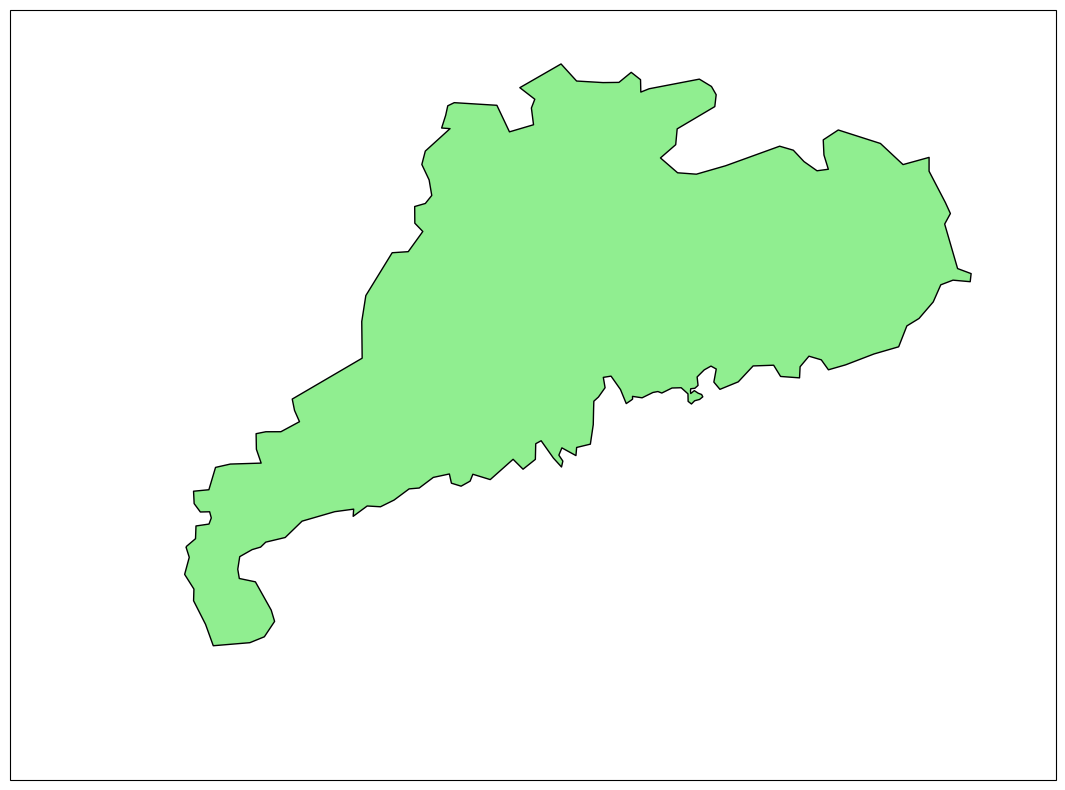

In [ ]:
# kml2json通用

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from shapely.geometry import Polygon

plt.rcParams['font.sans-serif'] = ['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

def loopFillColor(countryList, color):
    for country in countryList:
        country_data = world[world['name'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='white', linewidth=1, transform=ccrs.PlateCarree())

world = gpd.read_file('./worldmap4/world_update.json')
world = world.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})

plugin = gpd.read_file('./kml2geojson/Catalonia.geojson')
plugin = plugin.to_crs(ccrs.PlateCarree())
plugin.plot(ax=ax, color='lightgreen', edgecolor='k', linewidth=1, transform=ccrs.PlateCarree())


ax.tick_params(axis='both', which='both', length=0, labelsize=0)
# ax.set_extent([-1, 4, 40, 43.5], crs=ccrs.PlateCarree())
ax.set_extent([108, 118, 19, 26], crs=ccrs.PlateCarree())
plt.savefig('广东.png', dpi=1200, bbox_inches='tight')
plt.show()

Skipping field center: unsupported OGR type: 3
Skipping field centroid: unsupported OGR type: 3
Skipping field acroutes: unsupported OGR type: 1


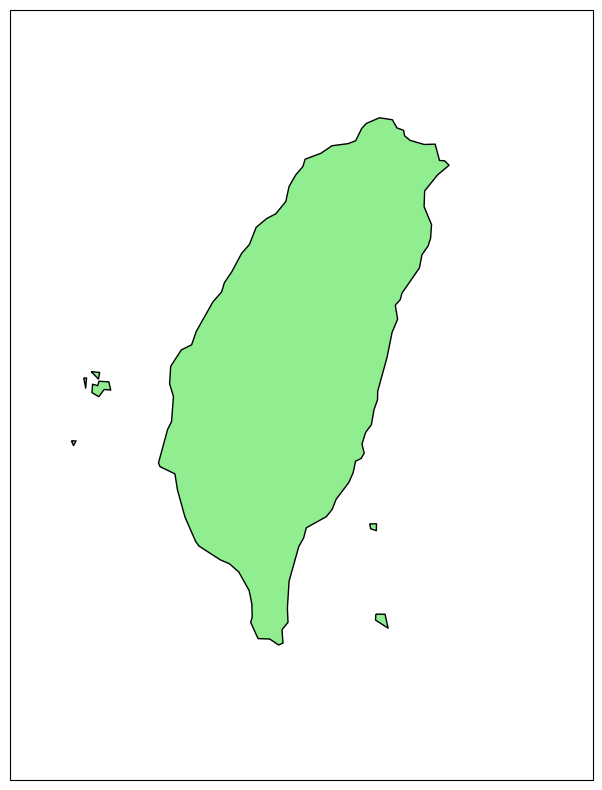

In [ ]:
# 中国行政区通用

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from shapely.geometry import Polygon

plt.rcParams['font.sans-serif'] = ['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

def loopFillColor(countryList, color):
    for country in countryList:
        country_data = world[world['name'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree())

world = gpd.read_file('./chinamap/geo_china.json')
world = world.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})
# world.plot(ax=ax, color='darkgray', edgecolor='white', linewidth=1, transform=ccrs.PlateCarree())

countries_to_fill1 = ['台湾省']
loopFillColor(countries_to_fill1, 'lightgreen')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())
plt.savefig('省份专用2.png', dpi=1200, bbox_inches='tight')
plt.show()

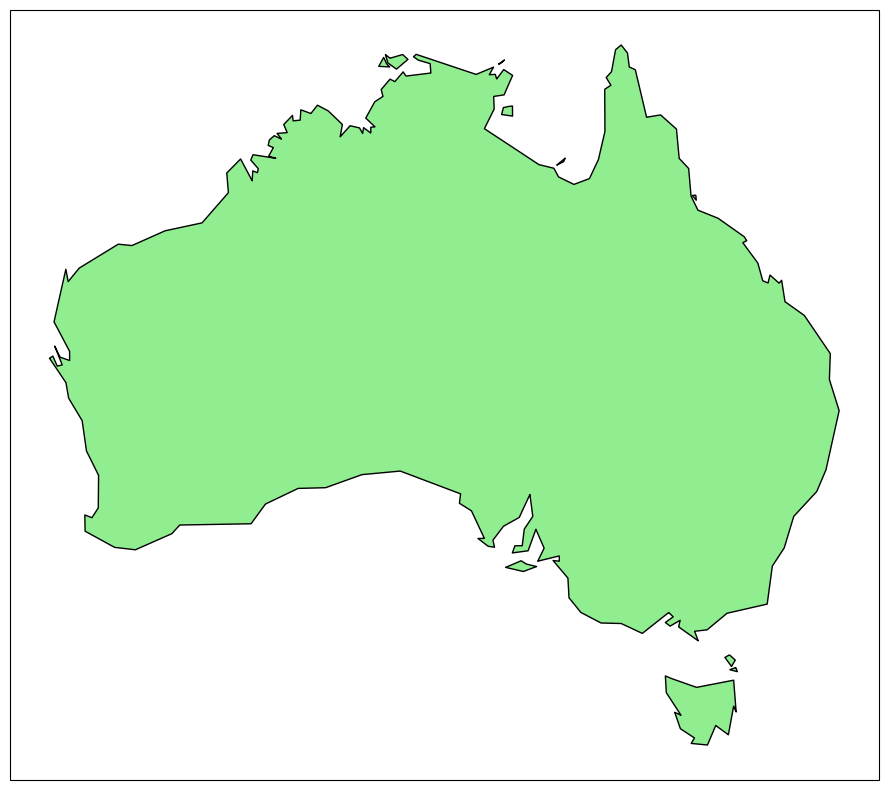

In [20]:
# 国家通用

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from shapely.geometry import Polygon

plt.rcParams['font.sans-serif'] = ['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

def loopFillColor(countryList, color):
    for country in countryList:
        country_data = world[world['name'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='k', linewidth=1, transform=ccrs.PlateCarree())

world = gpd.read_file('./worldmap4/world_update.json')
world = world.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})
# world.plot(ax=ax, color='darkgray', edgecolor='white', linewidth=1, transform=ccrs.PlateCarree())

countries_to_fill1 = ['澳大利亚']
loopFillColor(countries_to_fill1, 'lightgreen')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
# ax.set_extent([108, 161, -44, -7], crs=ccrs.PlateCarree())
plt.savefig('国家专用2.png', dpi=1200, bbox_inches='tight')
plt.show()